In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import os

In [2]:
pd.options.mode.use_inf_as_na = True
DATA_FOLDER = '/home/roger/code/kaggle/predict-future-sales/data'

transactions    = pd.read_csv(os.path.join(DATA_FOLDER, 'sales_train.csv'))
items           = pd.read_csv(os.path.join(DATA_FOLDER, 'items.csv'))
item_categories = pd.read_csv(os.path.join(DATA_FOLDER, 'item_categories_en.csv'))
shops           = pd.read_csv(os.path.join(DATA_FOLDER, 'shops_en.csv'))

In [8]:
idx_vars = ["date_block_num", "shop_id", "item_id"]

In [3]:
train = (transactions
     .merge(items, on="item_id")
     .merge(item_categories, on="item_category_id")
     .merge(shops, on="shop_id"))
train["date"] = pd.to_datetime(train["date"], format="%d.%m.%Y")

In [4]:
print(transactions.head(1).T)
print(items.head(1).T)
print(item_categories.head(1).T)
print(shops.head(1).T)

                         0
date            02.01.2013
date_block_num           0
shop_id                 59
item_id              22154
item_price             999
item_cnt_day             1
                                                          0
item_name         ! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.)         D
item_id                                                   0
item_category_id                                         40
                                             0
item_category_name  PC - Headsets / Headphones
item_category_id                             0
                                            0
shop_name  ! Yakutsk Ordzhonikidze, 56 francs
shop_id                                     0


In [5]:
for col in train:
    print(col.rjust(len("item_category_name")), "-", train[col].dtype)

              date - datetime64[ns]
    date_block_num - int64
           shop_id - int64
           item_id - int64
        item_price - float64
      item_cnt_day - float64
         item_name - object
  item_category_id - int64
item_category_name - object
         shop_name - object


In [6]:
avg_month = (train[["date_block_num", "shop_id", "item_id", "item_price", "item_cnt_day"]]
             .groupby(by=["date_block_num", "shop_id", "item_id", "item_price"])
             .agg("sum")
             .reset_index())

In [7]:
avg_month = (avg_month.merge(items, on="item_id")
     .merge(item_categories, on="item_category_id")
     .merge(shops, on="shop_id"))

## Distribution of sales by category

In [144]:
category_dist = (
    avg_month[["item_category_name", "item_cnt_day"]]
        .groupby(by="item_category_name")
        .agg("sum")
        .reset_index()
        .sort_values(by="item_cnt_day", ascending=False)
)

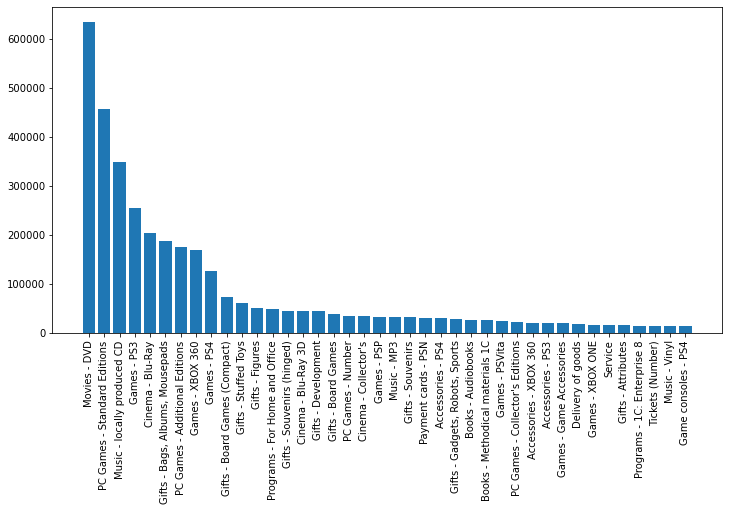

In [172]:
temp = category_dist[:40]
plt.figure(figsize=(12,6))
plt.bar(range(len(temp["item_cnt_day"])), height=temp["item_cnt_day"], tick_label=temp["item_category_name"])
plt.xticks(rotation=90)
plt.show()

## Distribution of Sales by shop

In [167]:
shop_dist = (
    avg_month[["shop_name", "item_cnt_day"]]
        .groupby(by="shop_name")
        .agg("sum")
        .reset_index()
        .sort_values(by="item_cnt_day", ascending=False)
)

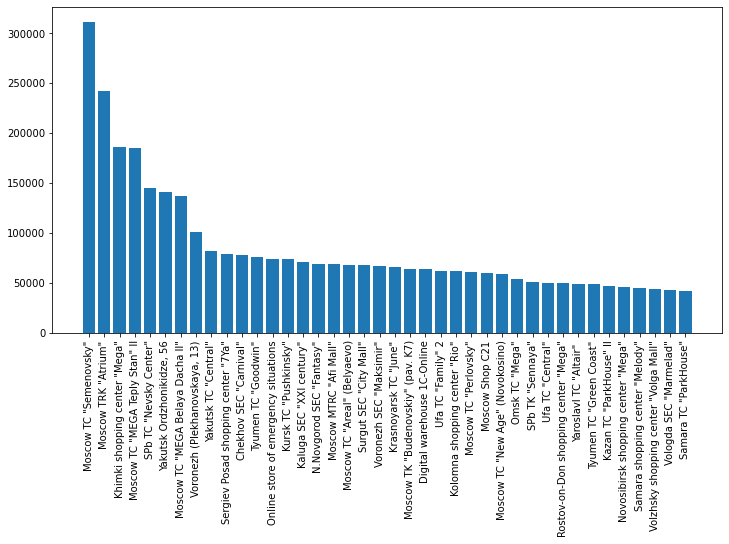

In [173]:
temp2 = shop_dist[:40]
plt.figure(figsize=(12,6))
plt.bar(x=range(len(temp2["item_cnt_day"])), height=temp2["item_cnt_day"], tick_label=temp2["shop_name"])
plt.xticks(rotation=90)
plt.show()

## Sales timeseries

In [19]:
sales_over_time = (
    avg_month[["date_block_num", "item_cnt_day"]]
        .groupby(by="date_block_num")
        .agg("sum")
        .reset_index()
        .sort_values(by="date_block_num")
)

In [20]:
sales_over_time.head()

,date_block_num,item_cnt_day
0,0,131479.0
1,1,128090.0
2,2,147142.0
3,3,107190.0
4,4,106970.0


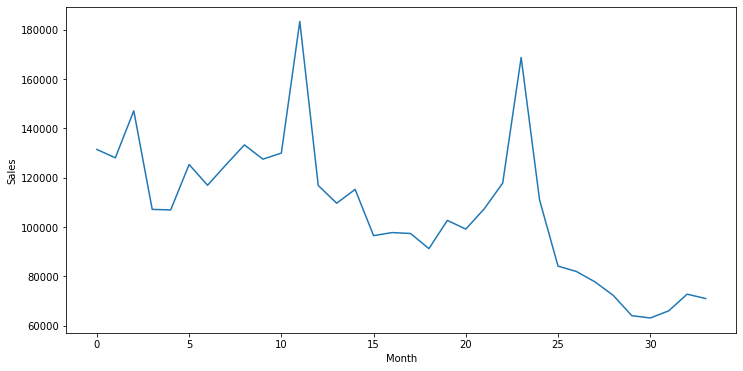

In [24]:
temp3 = sales_over_time[:40]
plt.figure(figsize=(12,6))
plt.plot(sales_over_time["date_block_num"], sales_over_time["item_cnt_day"])
plt.xlabel("Month")
plt.ylabel("Sales")
plt.xticks(rotation=0)
plt.show()

In [27]:
type(10//5)

int

In [28]:
5 < 6 < 7

True